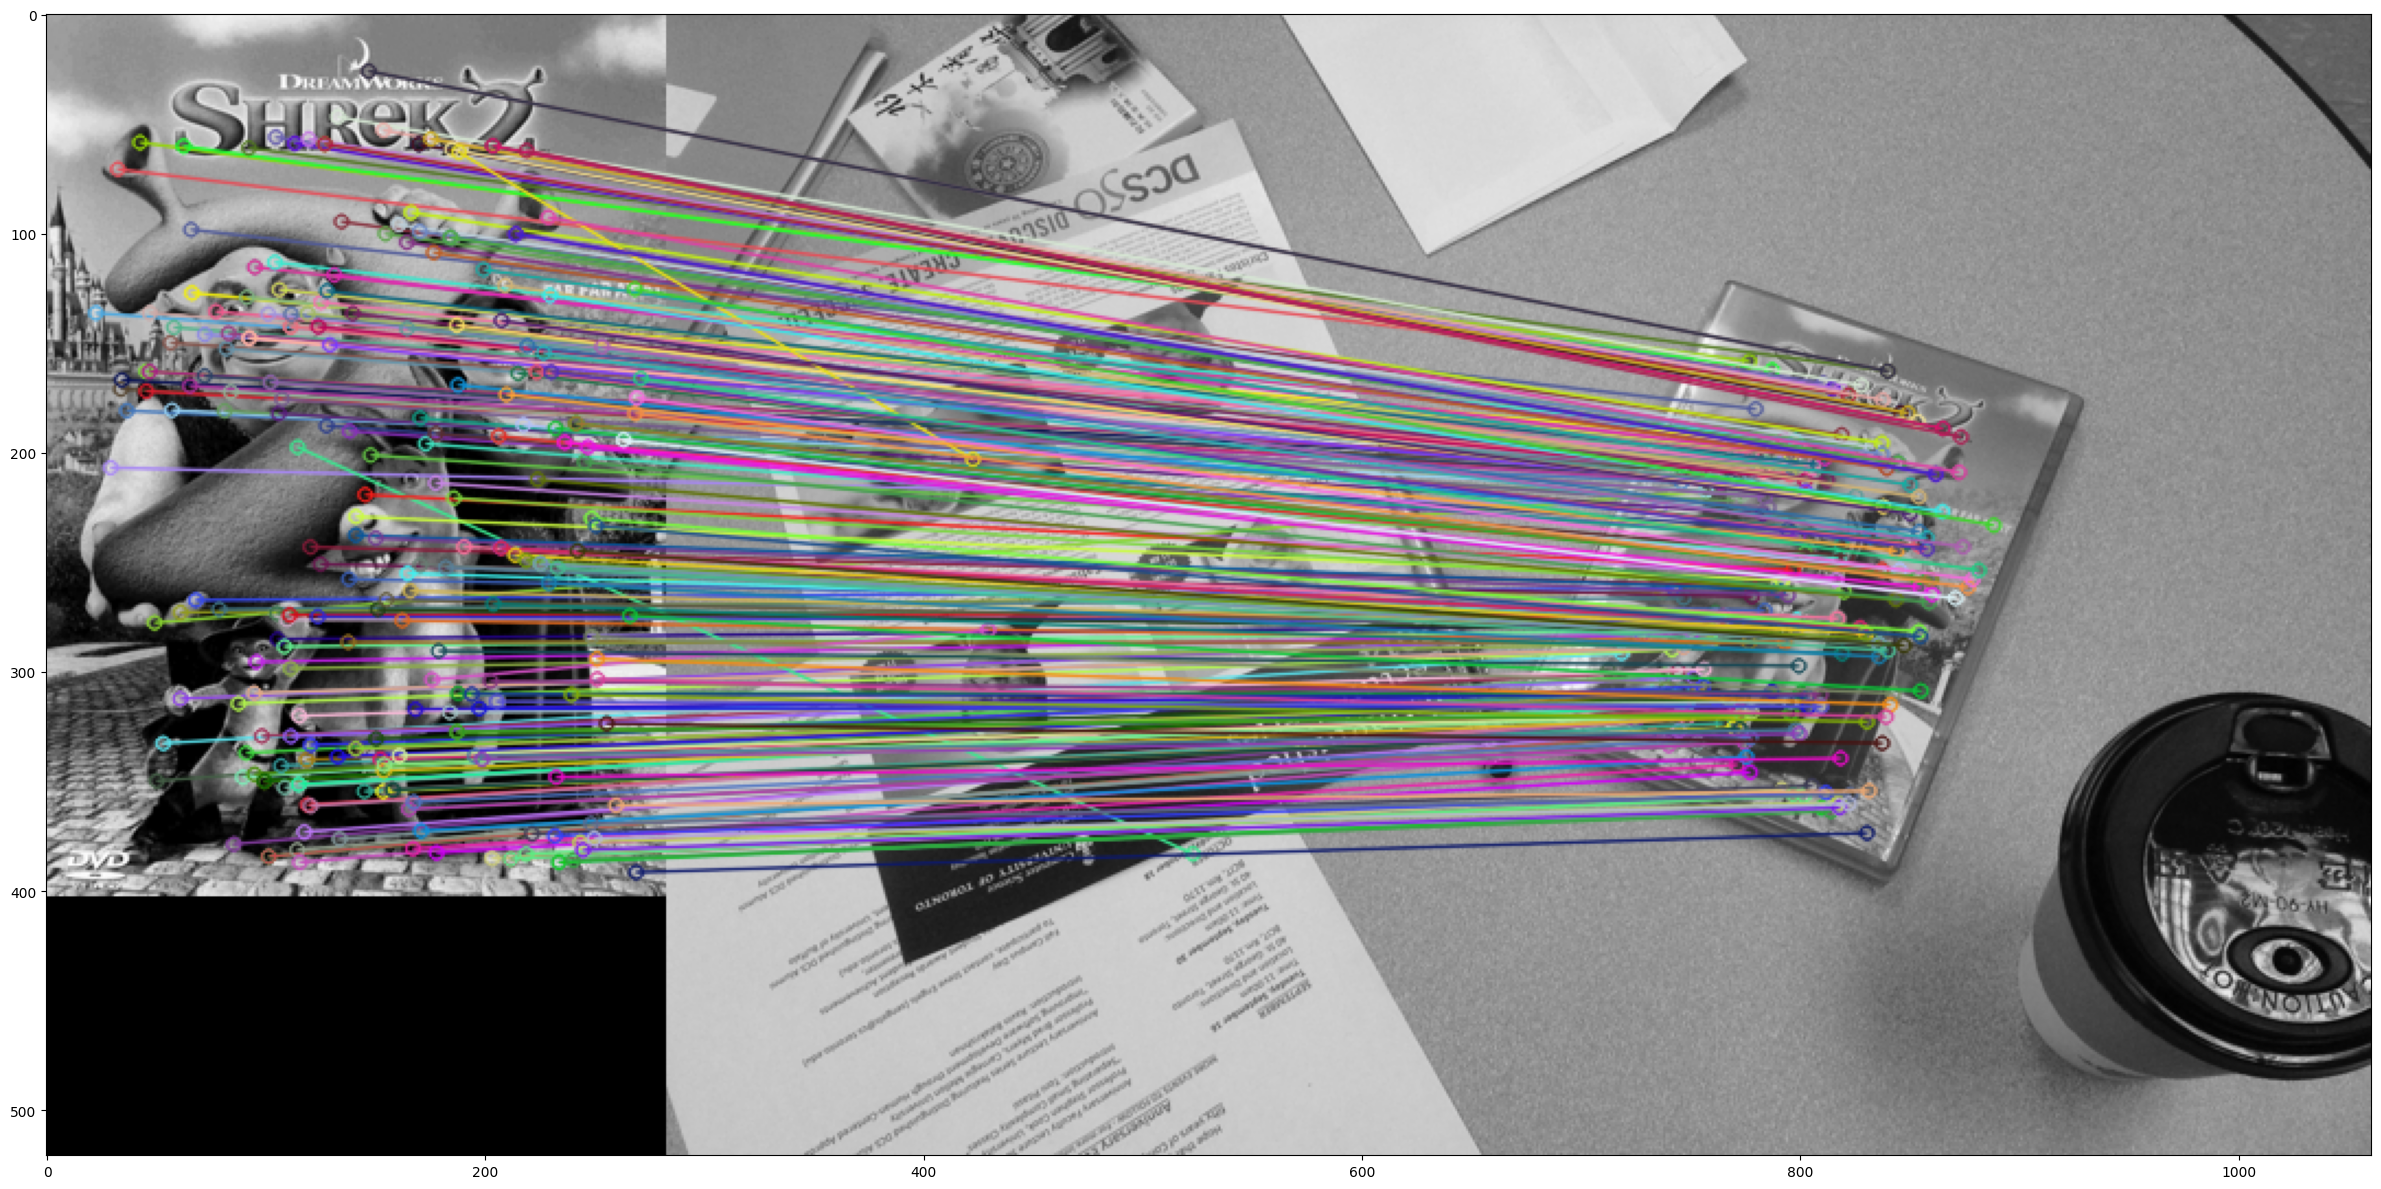

In [26]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
 
img1 = cv2.imread('reference.png',cv2.IMREAD_GRAYSCALE) # queryImage
img2 = cv2.imread('test.png',cv2.IMREAD_GRAYSCALE) # trainImage
 
# Initiate SIFT detector
sift = cv2.SIFT_create()
 
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
 
# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)
 
# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])
 
# cv.drawMatchesKnn expects list of lists as matches.
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.figure(figsize=(30,30))
plt.imshow(img3)
plt.show()

[22.32224464416504, 29.009784698486328, 32.31028366088867, 33.68083572387695, 34.15520477294922, 36.45600509643555, 42.46626281738281, 45.271759033203125, 45.310768127441406, 46.74155044555664, 46.8051643371582, 49.0651969909668, 49.96394348144531, 52.981143951416016, 56.373130798339844, 57.01284408569336, 57.89177703857422, 60.80735397338867, 60.80735397338867, 60.900970458984375, 62.338802337646484, 65.19396209716797, 65.70825958251953, 66.10814666748047, 67.8491439819336, 71.85899353027344, 72.01839447021484, 77.07648468017578, 78.54527282714844, 81.00236511230469, 81.81256103515625, 82.79258728027344, 83.83766174316406, 85.18818664550781, 87.34374237060547, 89.32292175292969, 90.85868835449219, 91.17276763916016, 92.07037353515625, 92.23648834228516, 92.23648834228516, 94.19386291503906, 94.4910659790039, 94.67160034179688, 94.84203338623047, 94.84203338623047, 95.47572326660156, 97.99695587158203, 99.14112091064453, 99.16580963134766, 100.84767150878906, 101.15611267089844, 101.15

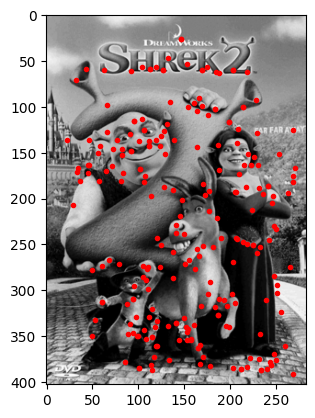

In [31]:
# print good[0] as numpy array
good1 = good[0]
good1 = np.array(good1)
# get the values from the good matches:

# get the keypoints from the good matches:
kp1 = np.array(kp1)
kp2 = np.array(kp2)

# get the coordinates of the keypoints:
x1 = [kp1[m[0].queryIdx].pt[0] for m in good]
y1 = [kp1[m[0].queryIdx].pt[1] for m in good]

x2 = [kp2[m[0].trainIdx].pt[0] for m in good]
y2 = [kp2[m[0].trainIdx].pt[1] for m in good]

print(x1, y1, x2, y2)


# plot the keypoints1

plt.plot(x1, y1, 'ro', markersize=3)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.show()

In [66]:
# compute the homography matrix

# get the coordinates of the keypoints:
x1 = [kp1[m[0].queryIdx].pt[0] for m in good]
y1 = [kp1[m[0].queryIdx].pt[1] for m in good]

x2 = [kp2[m[0].trainIdx].pt[0] for m in good]
y2 = [kp2[m[0].trainIdx].pt[1] for m in good]

A = np.array([(x1[i],y1[i]) for i in range(len(x1))])

B = np.array([(x2[i],y2[i]) for i in range(len(x2))])

A4 = A[:4,:]
B4 = B[:4,:]

In [69]:
print(A4)

[[ 22.32224464 136.38026428]
 [ 29.0097847  206.94715881]
 [ 32.31028366  70.74368286]
 [ 33.68083572 171.05245972]]


In [56]:
x1[0]

22.32224464416504

In [44]:
x1,x2 = np.linalg.solve([[1,2],[3,5]],[1,2])

print(x1,x2)

print(np.allclose(np.dot([[1,2],[3,5]], np.array([x1,x2])), [1,2]))

-0.9999999999999999 0.9999999999999999
True


In [49]:
np.dot(np.array([[1,2,3],[4,5,6],[7,8,9]]),np.array([1,2,3])) # same as A*B.T, B = [1,2,3]

array([14, 32, 50])